<a href="https://colab.research.google.com/github/jespimentel/api_cnj/blob/main/anpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANPPs ajuizadas
### José Eduardo de Souza Pimentel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
url = "https://api-publica.datajud.cnj.jus.br/api_publica_tjsp/_search" # url do TJSP
api_key = "APIKey cDZHYzlZa0JadVREZDJCendQbXY6SkJlTzNjLV9TRENyQk1RdnFKZGRQdw==" # Chave pública

payload = json.dumps({
  "size": 10000,
  "query": {
    "match": {"classe.codigo": 12729}  # 12729 (Exec. de Med. Alternativas)
  },
  "sort": [{"dataAjuizamento": {"order": "desc"}}] # ou asc
})

headers = {
  'Authorization': api_key,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)  # <Response [200]>
dados_dict = response.json() # <class 'dict'>
print(len(dados_dict))

4


In [3]:
display(dados_dict['hits']['hits'][10]) # Exemplo

{'_index': 'api_publica_tjsp',
 '_type': '_doc',
 '_id': 'TJSP_12729_G1_9674_10091315220248260224',
 '_score': None,
 '_source': {'classe': {'codigo': 12729,
   'nome': 'Execução de Medidas Alternativas no Juízo Comum'},
  'numeroProcesso': '10091315220248260224',
  'sistema': {'codigo': -1, 'nome': 'Inválido'},
  'formato': {'codigo': 1, 'nome': 'Eletrônico'},
  'tribunal': 'TJSP',
  'dataHoraUltimaAtualizacao': '2024-03-25T23:37:45.163Z',
  'grau': 'G1',
  '@timestamp': '2024-03-27T15:38:03.051Z',
  'dataAjuizamento': '2024-02-29T13:46:56.000Z',
  'movimentos': [{'complementosTabelados': [{'codigo': 2,
      'valor': 2,
      'nome': 'sorteio',
      'descricao': 'tipo_de_distribuicao_redistribuicao'}],
    'codigo': 26,
    'nome': 'Distribuição',
    'dataHora': '2024-02-29T15:08:28.000Z'}],
  'id': 'TJSP_12729_G1_9674_10091315220248260224',
  'nivelSigilo': 0,
  'orgaoJulgador': {'codigoMunicipioIBGE': 3518800,
   'codigo': 9674,
   'nome': 'EXECUCOES CRIMINAIS DE GUARULHOS'},
  '

In [4]:
processos = []

for processo in dados_dict['hits']['hits']:
  numero_processo = processo['_source']['numeroProcesso']
  grau = processo['_source']['grau']
  classe = processo['_source']['classe']['nome']
  assuntos = processo['_source']['assuntos'] # Pode ter mais de um
  data_ajuizamento = processo['_source']['dataAjuizamento']
  ultima_atualizacao = processo['_source']['dataHoraUltimaAtualizacao']
  formato = processo['_source']['formato']['nome']
  codigo = processo['_source']['orgaoJulgador']['codigo']
  orgao_julgador = processo['_source']['orgaoJulgador']['nome']
  municipio = processo['_source']['orgaoJulgador']['codigoMunicipioIBGE']
  sort = processo['sort'][0]
  try:
    movimentos = processo['_source']['movimentos']
  except:
    movimentos = []

  processos.append([numero_processo, classe, data_ajuizamento, ultima_atualizacao, formato, \
                    codigo, orgao_julgador, municipio, grau, assuntos, movimentos, sort])

df = pd.DataFrame(processos, columns=['numero_processo', 'classe', 'data_ajuizamento', 'ultima_atualizacao', \
                      'formato', 'codigo', 'orgao_julgador', 'municipio', 'grau', 'assuntos', 'movimentos', 'sort'])

df.sample(5)

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
1831,10170127520238260625,Execução de Medidas Alternativas no Juízo Comum,2023-11-03T11:06:42.000Z,2024-03-25T21:56:29.333Z,Eletrônico,10737,01 EXECUCOES CRIMINAIS DE TAUBATE,3554102,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1699009602000
8695,00054021120238260114,Execução de Medidas Alternativas no Juízo Comum,2023-03-29T10:19:11.000Z,2024-03-10T05:46:43.969Z,Eletrônico,10822,01 EXECUCOES CRIMINAIS DE CAMPINAS,3509502,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1680085151000
2378,10502191820238260576,Execução de Medidas Alternativas no Juízo Comum,2023-10-06T18:11:41.000Z,2024-03-26T02:48:27.783Z,Eletrônico,10961,EXECUCOES CRIMINAIS DE SAO JOSE DO RIO PRETO,3549805,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1696615901000
9580,10015732720238260624,Execução de Medidas Alternativas no Juízo Comum,2023-03-07T07:49:41.000Z,2024-03-10T05:08:24.489Z,Eletrônico,10723,02 CRIMINAL DE TATUI,3554003,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1678175381000
2321,10100814520238260079,Execução de Medidas Alternativas no Juízo Comum,2023-10-10T11:00:07.000Z,2024-03-26T02:46:00.877Z,Eletrônico,9419,02 CRIMINAL DE BOTUCATU,3507506,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1696935607000


In [5]:
def converte_data(data_str):
    return pd.to_datetime(data_str).tz_convert('America/Sao_Paulo')


def gera_lista_assuntos(assuntos_do_df):
    lst_assuntos=[]
    for assunto in assuntos_do_df:
        try:
            lst_assuntos.append(assunto.get('nome'))
        except:
            lst_assuntos.append('')

    return lst_assuntos


def gera_lista_movimentos(movimentos):
    lst_movimentos_final =[]
    for movimento in movimentos:
        codigo = movimento.get('codigo')
        nome = movimento.get('nome')
        data_hora = movimento.get('dataHora')
        if data_hora:
            data_hora = converte_data(data_hora)
        lst_movimentos_final.append([codigo, nome, data_hora])
    return lst_movimentos_final

In [6]:
df['assuntos'] = df['assuntos'].apply(gera_lista_assuntos)
df['movimentos'] = df['movimentos'].apply(gera_lista_movimentos)
df['data_ajuizamento'] = df['data_ajuizamento'].apply(converte_data)
df['ultima_atualizacao'] = df['ultima_atualizacao'].apply(converte_data)
df['movimentos']= df['movimentos'].apply(lambda x: sorted(x, key=lambda tup: tup[2], reverse=False))
df.sample(5)

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
9790,15009401020238260510,Execução de Medidas Alternativas no Juízo Comum,2023-03-02 11:30:54-03:00,2024-03-10 01:38:14.598000-03:00,Eletrônico,10197,JURI/EXEC./INF.JUV. DE RIO CLARO,3543907,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-03-02 13:09:21-03:00]...",1677767454000
3436,15005573920238260443,Execução de Medidas Alternativas no Juízo Comum,2023-08-21 09:37:01-03:00,2024-03-25 23:05:40.962000-03:00,Eletrônico,10046,01 CUMULATIVA DE PIEDADE,3537800,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-21 10:04:20-03:00]...",1692621421000
6836,10211064720238260114,Execução de Medidas Alternativas no Juízo Comum,2023-05-15 12:42:15-03:00,2024-02-27 22:49:07.097000-03:00,Eletrônico,10822,01 EXECUCOES CRIMINAIS DE CAMPINAS,3509502,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-05-16 07:21:08-03:00]...",1684165335000
6172,10020389620238260022,Execução de Medidas Alternativas no Juízo Comum,2023-05-31 12:29:25-03:00,2024-03-26 01:04:29.820000-03:00,Eletrônico,9275,01 CUMULATIVA DE AMPARO,3501905,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-05-31 13:32:59-03:00]...",1685546965000
8569,10001325120238260449,Execução de Medidas Alternativas no Juízo Comum,2023-04-03 11:37:29-03:00,2023-08-29 13:39:31.019000-03:00,Eletrônico,9859,VARA UNICA DE PIQUETE,3538501,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-04-10 09:51:26-03:00]...",1680532649000


In [7]:
# Gravação dos arquivos

df.to_csv('anpp.csv', sep=',', header=True, index=False)

with open('movimentos_anpp.txt', 'w') as file:
    for index, row in df.iterrows():
        file.write(f"Autos n. {row['numero_processo']}, Classe: {row['classe']}\n")
        file.write(f"Ajuizamento: {row['data_ajuizamento']}\n")
        file.write(f"Assuntos: {row['assuntos']}\n\n")
        for movimento in row['movimentos']:
            file.write(f"{str(movimento[2])} | Cód: {str(movimento[0])} | Mov.: {movimento[1]} \n")
        file.write('\n-----------------------------------------------------------------------------\n\n')

# Análises

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype                            
---  ------              --------------  -----                            
 0   numero_processo     10000 non-null  object                           
 1   classe              10000 non-null  object                           
 2   data_ajuizamento    10000 non-null  datetime64[ns, America/Sao_Paulo]
 3   ultima_atualizacao  10000 non-null  datetime64[ns, America/Sao_Paulo]
 4   formato             10000 non-null  object                           
 5   codigo              10000 non-null  int64                            
 6   orgao_julgador      10000 non-null  object                           
 7   municipio           10000 non-null  int64                            
 8   grau                10000 non-null  object                           
 9   assuntos            10000 non-null  object                    

In [9]:
df['assuntos'].value_counts()

[Acordo de Não Persecução Penal]                                        9952
[Pena de Multa]                                                           12
[Acordo de Não Persecução Penal, Prestação de Serviços à Comunidade]       8
[Falsificação de documento público]                                        6
[Execução Penal e de Medidas Alternativas]                                 5
[Falsificação de papéis públicos ]                                         4
[Pena Restritiva de Direitos]                                              3
[Atos Processuais]                                                         2
[Crimes de Trânsito]                                                       2
[Pena Privativa de Liberdade]                                              1
[Intimação]                                                                1
[Furto ]                                                                   1
[Prestação Pecuniária, Acordo de Não Persecução Penal]                     1

In [10]:
mask = df['assuntos'].apply(lambda x: 'Acordo de Não Persecução Penal' in x)
df_anpp = df[mask]
print(f'Total de registros: {len(df_anpp)}')
print(f"Data final: {df_anpp['data_ajuizamento'].max()}")
print(f"Data inicial: {df_anpp['data_ajuizamento'].min()}")

Total de registros: 9962
Data final: 2024-02-29 15:45:18-03:00
Data inicial: 2023-02-23 15:44:56-03:00


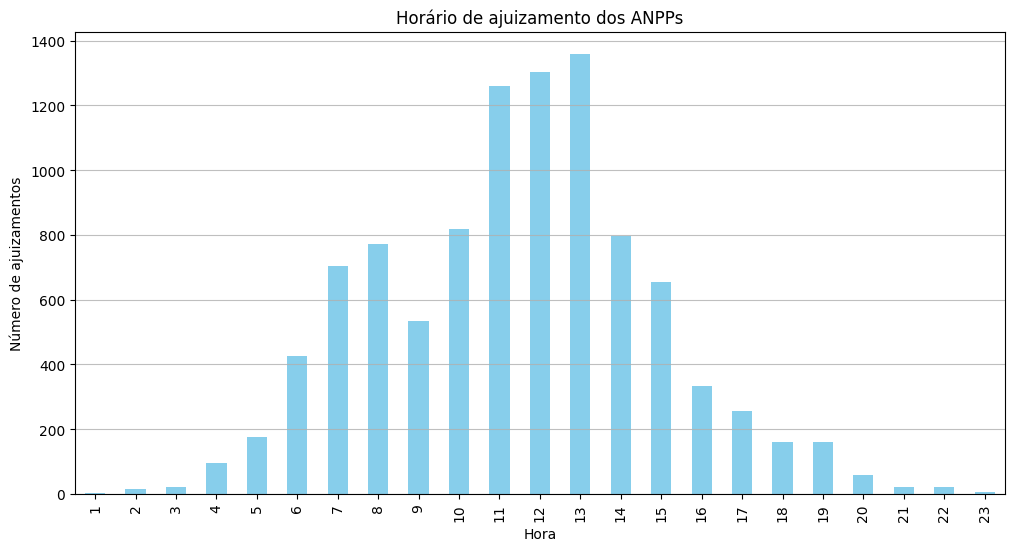

In [11]:
# Horário em que os ANPPs foram ajuizados

contagem = df_anpp['data_ajuizamento'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', color='skyblue')
plt.title('Horário de ajuizamento dos ANPPs')
plt.xlabel('Hora')
plt.ylabel('Número de ajuizamentos')
plt.grid(axis='y', alpha=0.8)
plt.savefig('horario_anpp.jpg')
plt.show()

In [12]:
display(contagem[8:19])
ajuizamentos_expediente = contagem[8:19].sum()
ajuizamentos_expediente

9      534
10     819
11    1259
12    1304
13    1359
14     798
15     654
16     333
17     257
18     162
19     161
Name: data_ajuizamento, dtype: int64

7640

In [13]:
display(contagem[0:8])
display(contagem[19:])
ajuizamentos_fora = contagem[0:8].sum() + contagem[19:].sum()
ajuizamentos_fora

1      4
2     16
3     22
4     95
5    177
6    425
7    703
8    772
Name: data_ajuizamento, dtype: int64

20    60
21    23
22    20
23     5
Name: data_ajuizamento, dtype: int64

2322

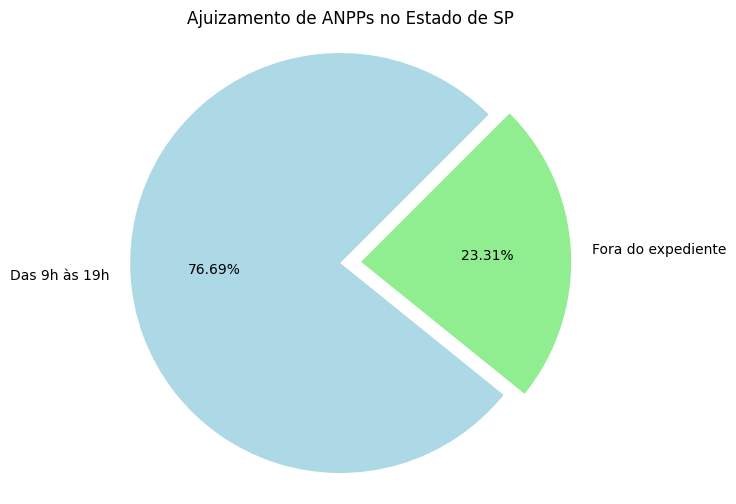

In [14]:
labels = ['Das 9h às 19h', 'Fora do expediente']

sizes = [ajuizamentos_expediente, ajuizamentos_fora]

colors = ['lightblue', 'lightgreen']

# Explosão da fatia
explode = (0.1, 0)

# Gerando o gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=45)

plt.title('Ajuizamento de ANPPs no Estado de SP')

plt.axis('equal')
plt.savefig('pizza_anpp.jpg')
plt.show()

In [15]:
df_anpp.set_index('data_ajuizamento', inplace=True)

In [16]:
df_resampled = df_anpp.resample('M').size()
df_resampled = df_resampled[1:] # Excluímos a primeira série de dados, que pode não estar completa (em razão do limite da resposta)
x = []
y = []
for index, value in df_resampled.items():
    x.append(f'Mês de {str(index)[:7]}')
    y.append(value)

In [17]:
# Ajuizamentos mensais
df_resampled

data_ajuizamento
2023-03-31 00:00:00-03:00    1266
2023-04-30 00:00:00-03:00    1127
2023-05-31 00:00:00-03:00    1310
2023-06-30 00:00:00-03:00    1146
2023-07-31 00:00:00-03:00    1132
2023-08-31 00:00:00-03:00     737
2023-09-30 00:00:00-03:00     578
2023-10-31 00:00:00-03:00     686
2023-11-30 00:00:00-03:00     483
2023-12-31 00:00:00-03:00     486
2024-01-31 00:00:00-03:00     343
2024-02-29 00:00:00-03:00     525
Freq: M, dtype: int64

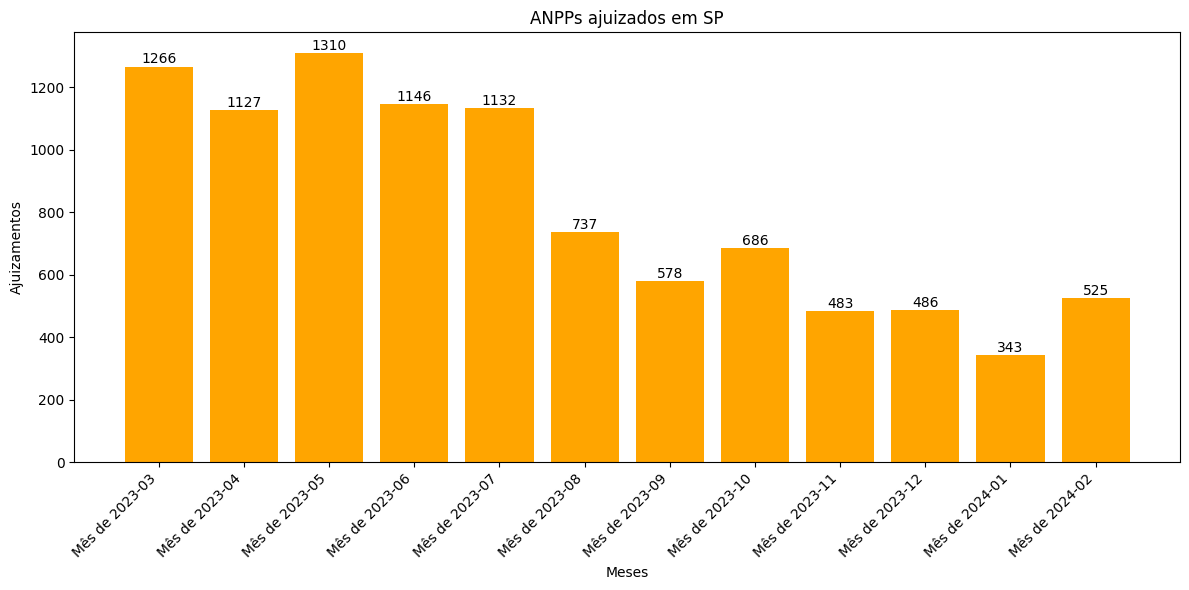

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='orange')

plt.xlabel('Meses')
plt.ylabel('Ajuizamentos')
plt.title('ANPPs ajuizados em SP')
plt.xticks(rotation=45,ha='right')

for i in range(len(x)):
    plt.text(x=x[i], y=y[i]+10, s=str(y[i]), ha='center')

plt.tight_layout()
plt.savefig('n_ajuizamentos_anpp.jpg')
plt.show()

In [19]:
top_100 = df_anpp.groupby(['municipio', 'orgao_julgador'])['codigo'].count().sort_values(ascending=False).head(100)
with open('top_100_ajuizamentos_anpp.txt', 'w') as file:
    for index, value in top_100.items():
        texto = f"{index[0]} | {index[1]} |{value}"
        file.write(texto + '\n')
        print(texto)

3550308 | 05 EXECUCOES CRIMINAIS DE CENTRAL |700
3549805 | EXECUCOES CRIMINAIS DE SAO JOSE DO RIO PRETO |365
3529005 | EXECUCOES CRIMINAIS DE MARILIA |225
3507506 | 02 CRIMINAL DE BOTUCATU |208
3529401 | JURI/EXEC./INF.JUV. DE MAUA |198
3518800 | EXECUCOES CRIMINAIS DE GUARULHOS |192
3541000 | JURI/EXECUCOES/INFANCIA E JUVENTUDE DE PRAIA GRANDE |188
3538709 | JURI/EXECUCOES DE PIRACICABA |173
3543907 | JURI/EXEC./INF.JUV. DE RIO CLARO |171
3552205 | JURI/EXECUCOES DE SOROCABA |170
3550308 | 02 EXECUCOES CRIMINAIS DE CENTRAL |159
3506003 | 02 EXECUCOES CRIMINAIS DE BAURU |159
3520509 | 02 CRIMINAL DE INDAIATUBA |158
3516200 | JURI/EXEC./INF.JUV. DE FRANCA |158
3549904 | JURI/EXECUCOES DE SAO JOSE DOS CAMPOS |150
3534401 | JURI/EXECUCOES DE OSASCO |148
3552403 | 01 CRIMINAL DE SUMARE |132
3509502 | 01 EXECUCOES CRIMINAIS DE CAMPINAS |132
3505708 | 01 CRIMINAL DE BARUERI |121
3534708 | 01 CRIMINAL DE OURINHOS |121
3523107 | 01 CRIMINAL DE ITAQUAQUECETUBA |115
3516408 | JURI/EXEC./INF.JUV.